In [28]:
### import packages
import numpy as np
import dask
import dask.array as da
from glob import glob
from h5py import File
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import os
import shutil
from glob import glob
import sys
import numpy as np 
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io
from scipy.signal import find_peaks
from pandas import read_csv
from scipy.signal import medfilt

In [25]:
#load data
fluo_path_trpv1 = r'G:\My Drive\adenosine_paper\adenosine_paper_data\Fig_2I\compiled_fluo.csv'
fluo_path_matp =  r'G:\My Drive\adenosine_paper\adenosine_paper_data\Fig_2G\compiled_fluo_atp.csv'
fluo_trpv1 = np.array(read_csv(fluo_path_trpv1)).T #trpv1 experiments for Fig 2I
fluo_matp = np.array(read_csv(fluo_path_matp)).T #methoxamine experiments for Fig 2G

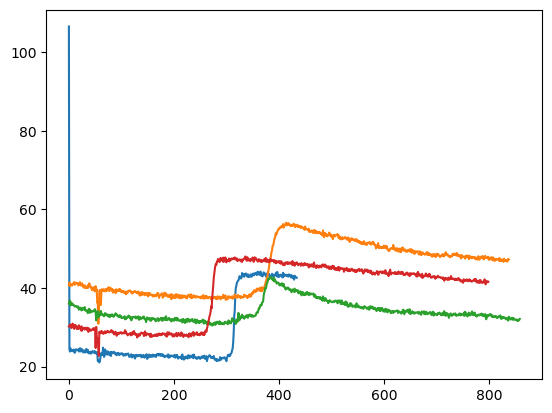

In [30]:
#visualize data
plt.figure()
plt.plot(fluo_trpv1.T)
#plt.xlim(200,400)

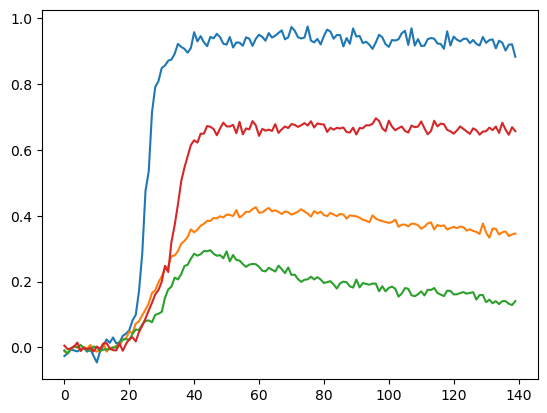

In [38]:
#ATP event onset is slightly different for each fish due to differences in diffusion of capsaicin into brain - manually align traces and subtract baseline
onsets = [310,375,360,260]
aligned_fluo_t = np.zeros([4,140])
for i in range(len(onsets)):
    onset = onsets[i]
    start_t = onset - 20
    end_t = onset + 120
    baseline = np.mean(fluo_trpv1[i][start_t:onset])
    raw = fluo_trpv1[i][start_t:end_t]
    aligned_fluo_t[i] = (raw - baseline) / baseline

plt.figure()
plt.plot(aligned_fluo_t.T)

In [47]:
#compute mean and standard error
meanfluo_t = np.mean(aligned_fluo_t,axis=0)
sefluo_t = np.std(aligned_fluo_t,axis=0)/np.sqrt(len(aligned_fluo_t))

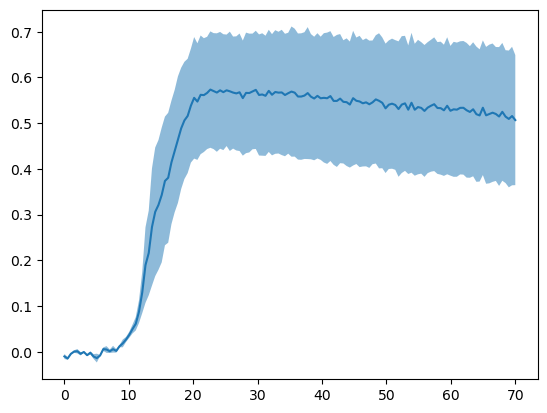

In [77]:
plt.figure()
time = np.linspace(0,70,140) #sampling rate is 2Hz
plt.plot(time,meanfluo_t)
plt.fill_between(time,meanfluo_t-sefluo_t,meanfluo_t+sefluo_t,alpha=0.5)

plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\Fig2\revision\Fig_2I.svg',dpi=300)

In [49]:
#split methoxamine data into timestamps and fluorescence values
atp_m = np.zeros([int(np.shape(fluo_matp)[0]/2),int(np.shape(fluo_matp)[1])])
time_m = np.zeros([int(np.shape(fluo_matp)[0]/2),int(np.shape(fluo_matp)[1])])

for i in range(np.shape(time_m)[0]):
    time_m[i] = fluo_matp[2*i]
    atp_m[i] = fluo_matp[2*i+1]

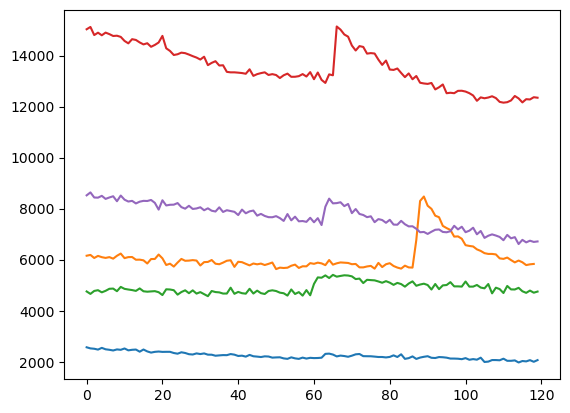

In [45]:
plt.figure()
plt.plot(atp_m.T)
#plt.xlim(80,100)

In [72]:
#align signals and calculate dff
onsets = [62,86,59,65,62]
aligned_fluo_m = np.zeros([5,38])
aligned_fluo_m_ctrl = np.zeros([5,38])
for i in range(len(onsets)):
    onset = onsets[i]
    start_t = onset - 6
    end_t = onset + 32
    baseline = np.mean(atp_m[i][start_t:onset])
    raw = atp_m[i][start_t:end_t]
    aligned_fluo_m[i] = (raw - baseline) / baseline
    raw_ctrl = atp_m[i][10:48]
    baseline_ctrl = np.mean(atp_m[i][10:20])
    aligned_fluo_m_ctrl[i] = (raw_ctrl - baseline_ctrl) / baseline_ctrl

In [73]:
#calculate mean and se
mean_atp_m = np.mean(aligned_fluo_m,axis=0)
se_atp_m = np.std(aligned_fluo_m,axis=0) / np.sqrt(len(aligned_fluo_m))
mean_atp_mc = np.mean(aligned_fluo_m_ctrl,axis=0)
se_atp_mc = np.std(aligned_fluo_m_ctrl,axis=0) / np.sqrt(len(aligned_fluo_m_ctrl))

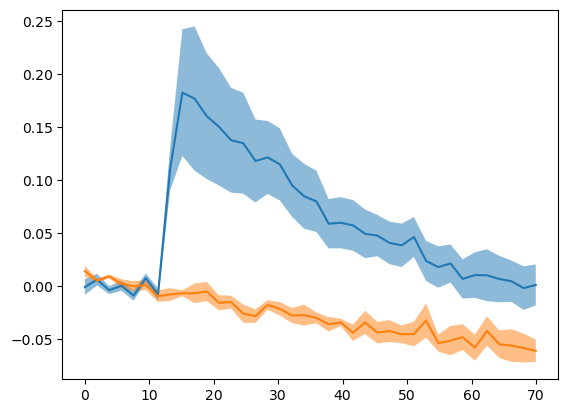

In [76]:
time = time_m[0][0:38]
plt.figure()
plt.plot(time,mean_atp_m)
plt.fill_between(time,mean_atp_m - se_atp_m, mean_atp_m + se_atp_m,alpha = 0.5)
plt.plot(time,mean_atp_mc)
plt.fill_between(time,mean_atp_mc - se_atp_mc, mean_atp_mc + se_atp_mc,alpha = 0.5)
plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\Fig2\revision\Fig_2G.svg',dpi=300)